# Variational Autoencoders

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import os
import sys

In [2]:
# specify hyper-parameters for pyplot
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
# save figures under current directory
PROJECT_ROOT_ID = '.'
CHAPTER_ID = 'chapter_15'

In [4]:
from mlxtend.data import loadlocal_mnist

In [5]:
X_train, Y_train = loadlocal_mnist(images_path=r'/home/bob/scikit_learn_data/train-images.idx3-ubyte', 
                                   labels_path=r'/home/bob/scikit_learn_data/train-labels.idx1-ubyte')

X_test, Y_test = loadlocal_mnist(images_path=r'/home/bob/scikit_learn_data/t10k-images.idx3-ubyte', 
                                 labels_path=r'/home/bob/scikit_learn_data/t10k-labels.idx1-ubyte')

# normalization
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# validation set
X_validation, X_train = X_train[:5000],X_train[5000:]
Y_validation, Y_train = Y_train[:5000], Y_train[5000:]

In [6]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(os.getcwd(), 'c11_figures')
     
    if not os.path.exists(path):
        os.mkdir('c11_figures')
    
    if tight_layout:
        plt.tight_layout()
        
    path = os.path.join(path, fig_id)
    plt.savefig(path, format='png', dpi=300)

In [7]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys")
    plt.axis("off")

In [8]:
def compare_figure(X, outputs, n_test_digits=2):  
    for digit in range(n_test_digits):
        plt.subplot(n_test_digits, 2, digit*2+1)
        plot_image(X[index])
        plt.subplot(n_test_digits, 2, digit*2+2)
        plot_image(outputs[index])

### network building sequence

In [20]:
from functools import partial

n_inputs = 28*28
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20 #coding layer
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.001

# he_init = tf.variance_scaling_initializer()
he_init = tf.contrib.layers.variance_scaling_initializer()

# self-defined reusable hidden layer
my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=he_init)

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)

# parameter of latent distribution
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma = my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)

# latent variable(row vector) that stores dependent variable representing each axis(dimension) of the Gaussian distribution 
hidden3 = hidden3_mean + hidden3_sigma * noise
    
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)

# outputs
logits = my_dense_layer(hidden5, n_outputs, activation=None)

In [23]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy)

In [24]:
eps = 1e-10 # smoothing term to avoid computing log(0) which is NaN
latent_loss = 0.5 * tf.reduce_sum(
    tf.square(hidden3_sigma) + tf.square(hidden3_mean)
    - 1 - tf.log(eps + tf.square(hidden3_sigma)))

In [25]:
loss = reconstruction_loss + latent_loss

In [26]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [14]:
def fetch_batch(dataset_X, dataset_Y, epoch_index, batch_index, batch_size):
    np.random.seed(epoch_index*batch_size+batch_index)
    selected_samples = np.random.randint(X_train.shape[1], size=batch_size)
    X_batch = dataset_X[selected_samples]
    Y_batch = dataset_Y[selected_samples]
    return X_batch, Y_batch

epoch 0 total loss: 40870.7265625 	reconstruction loss: 30075.3046875 	latent loss: 10795.419921875
epoch 1 total loss: 24837.39453125 	reconstruction loss: 20860.26171875 	latent loss: 3977.13232421875
epoch 2 total loss: 26088.36328125 	reconstruction loss: 21625.2578125 	latent loss: 4463.1064453125
epoch 3 total loss: 28857.263671875 	reconstruction loss: 23311.6796875 	latent loss: 5545.58349609375
epoch 4 total loss: 26593.443359375 	reconstruction loss: 20478.51953125 	latent loss: 6114.923828125
epoch 5 total loss: 23512.8046875 	reconstruction loss: 17848.46484375 	latent loss: 5664.3408203125
epoch 6 total loss: 18346.767578125 	reconstruction loss: 15167.3515625 	latent loss: 3179.41552734375
epoch 7 total loss: 16060.892578125 	reconstruction loss: 12855.896484375 	latent loss: 3204.99658203125
epoch 8 total loss: 14556.7109375 	reconstruction loss: 11277.5146484375 	latent loss: 3279.19677734375
epoch 9 total loss: 13611.1513671875 	reconstruction loss: 10293.7177734375 	l

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


epoch 21 total loss: 32378.12890625 	reconstruction loss: 23429.0859375 	latent loss: 8949.0439453125
epoch 22 total loss: 42865.359375 	reconstruction loss: 28524.9375 	latent loss: 14340.423828125
epoch 23 total loss: 24956.01953125 	reconstruction loss: 19430.412109375 	latent loss: 5525.6064453125
epoch 24 total loss: 27503.921875 	reconstruction loss: 19563.43359375 	latent loss: 7940.4892578125
epoch 25 total loss: 19135.728515625 	reconstruction loss: 14614.294921875 	latent loss: 4521.43310546875
epoch 26 total loss: 14861.9765625 	reconstruction loss: 11081.2314453125 	latent loss: 3780.74462890625
epoch 27 total loss: 12504.7646484375 	reconstruction loss: 9403.7919921875 	latent loss: 3100.972900390625
epoch 28 total loss: 12027.5537109375 	reconstruction loss: 9076.330078125 	latent loss: 2951.223388671875
epoch 29 total loss: 11724.451171875 	reconstruction loss: 8732.85546875 	latent loss: 2991.59619140625
epoch 30 total loss: 11633.0 	reconstruction loss: 8722.49609375 	

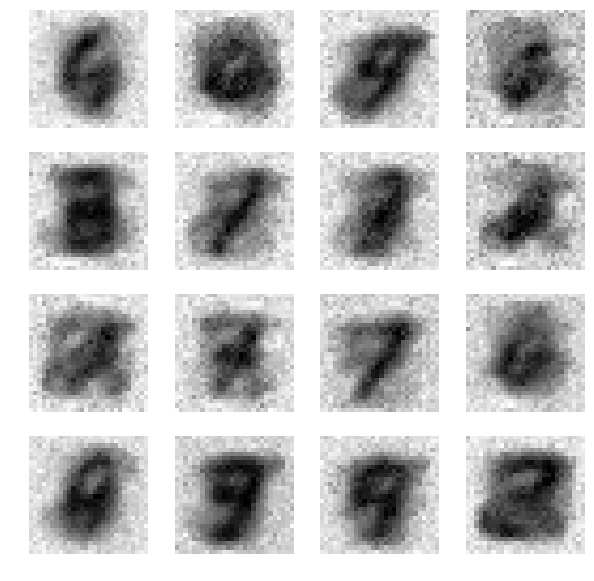

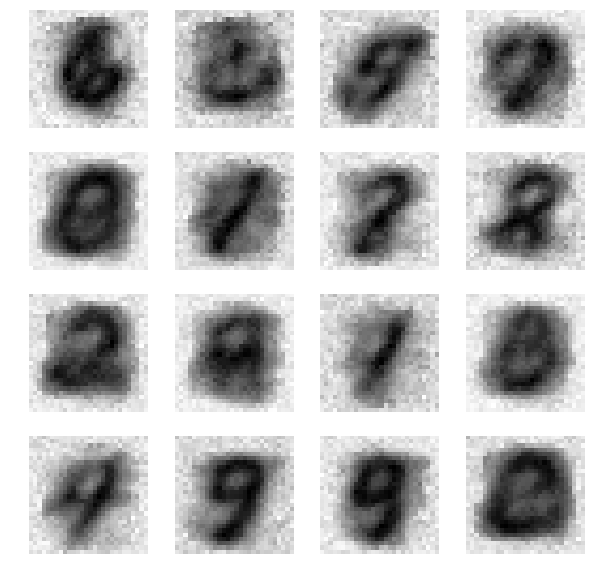

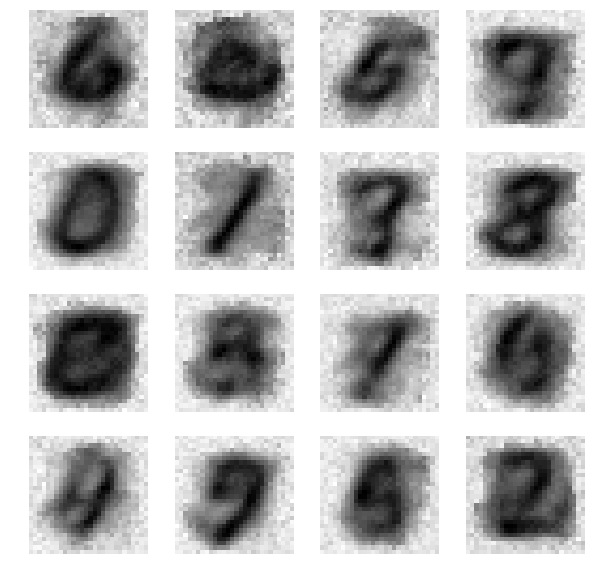

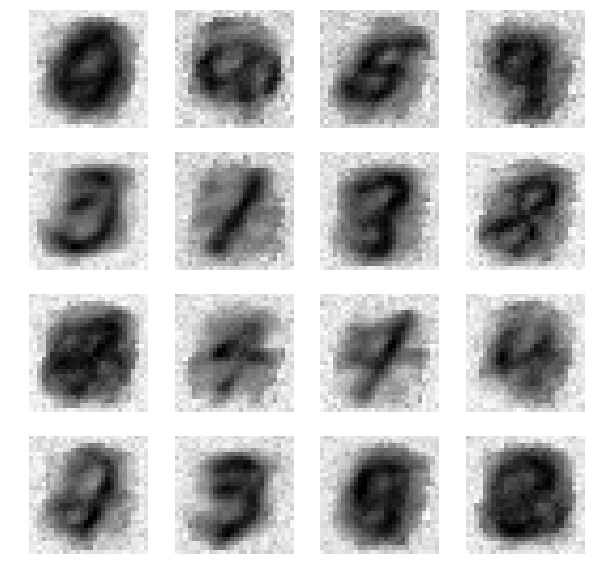

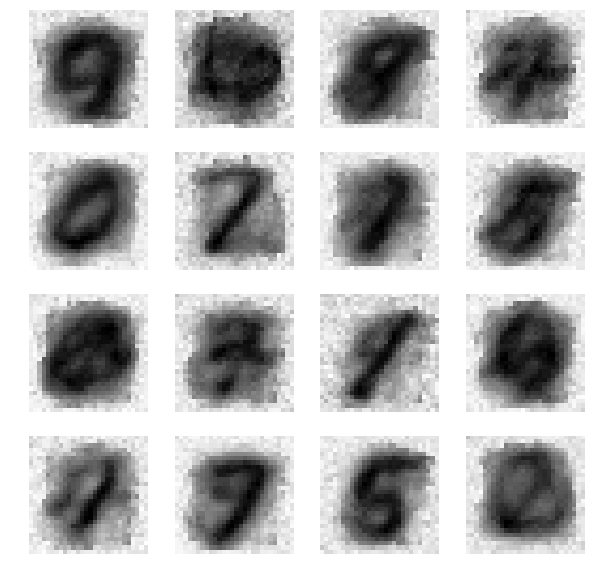

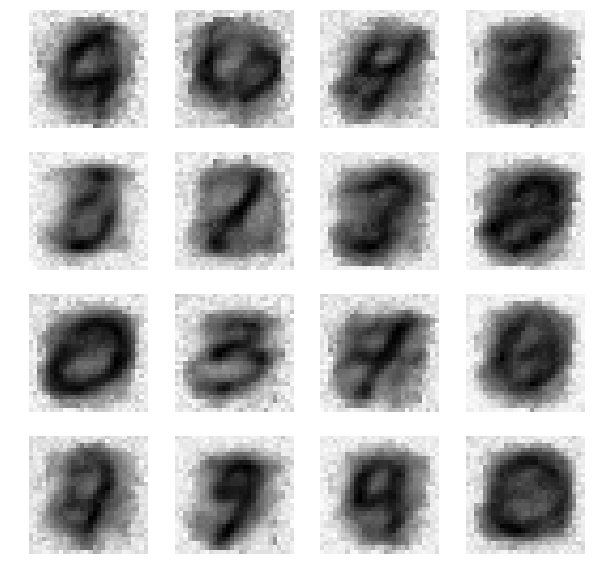

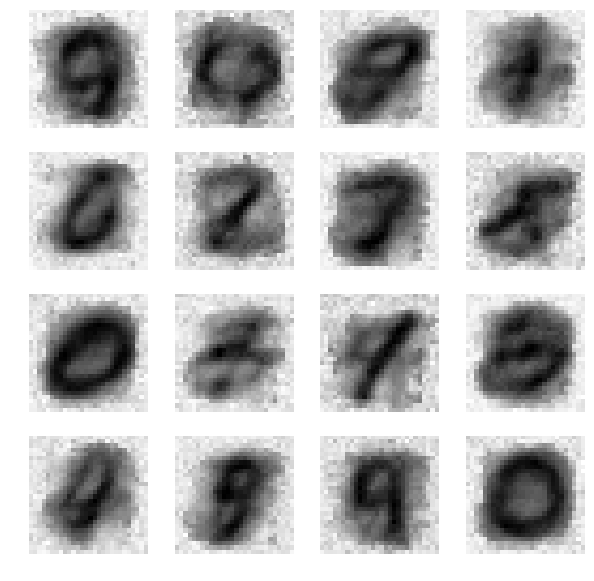

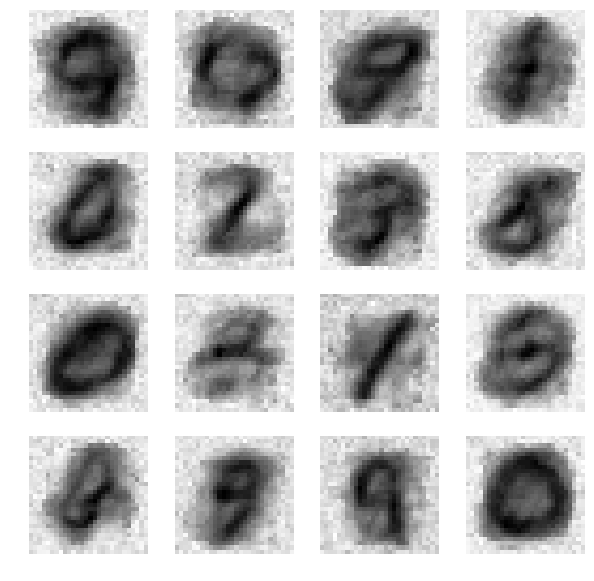

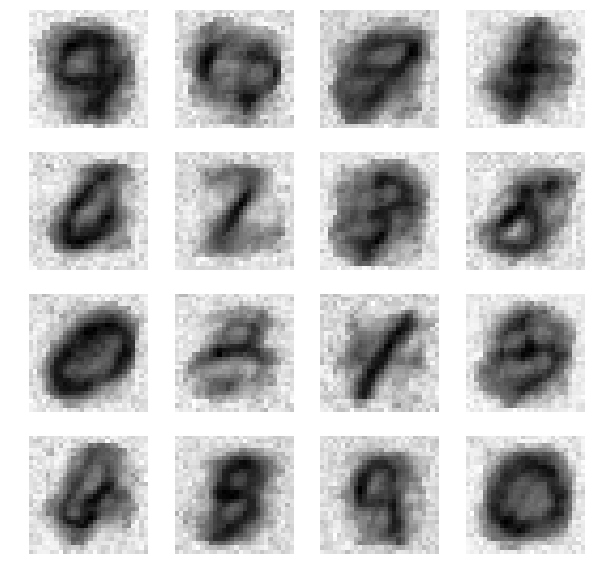

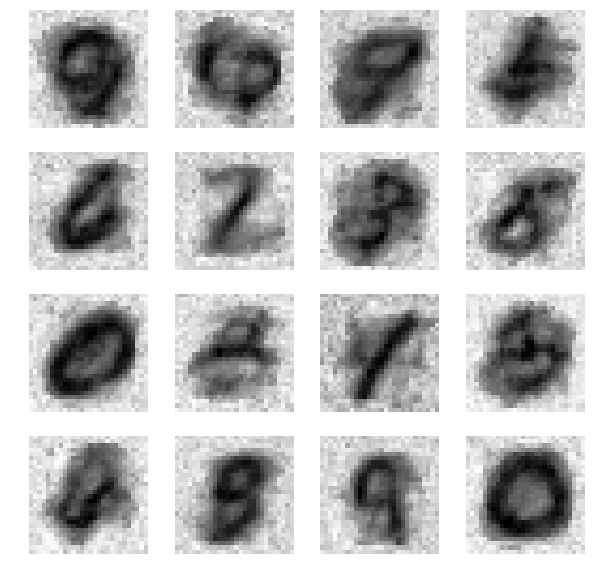

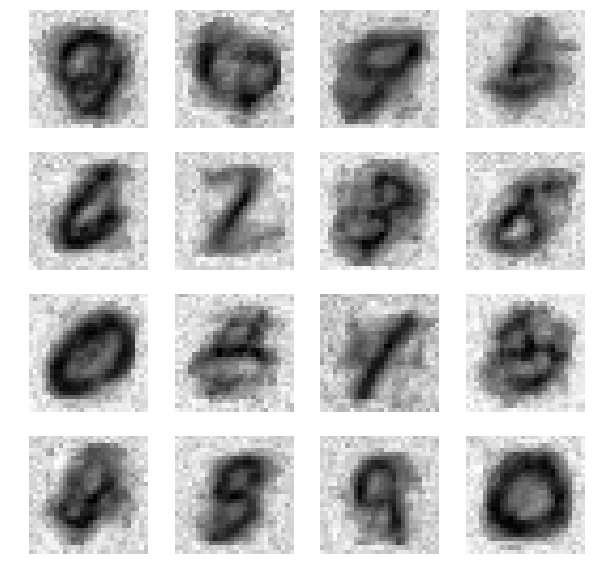

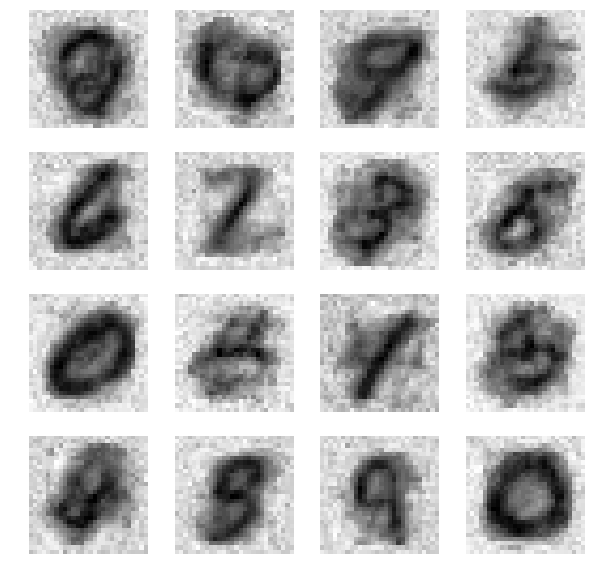

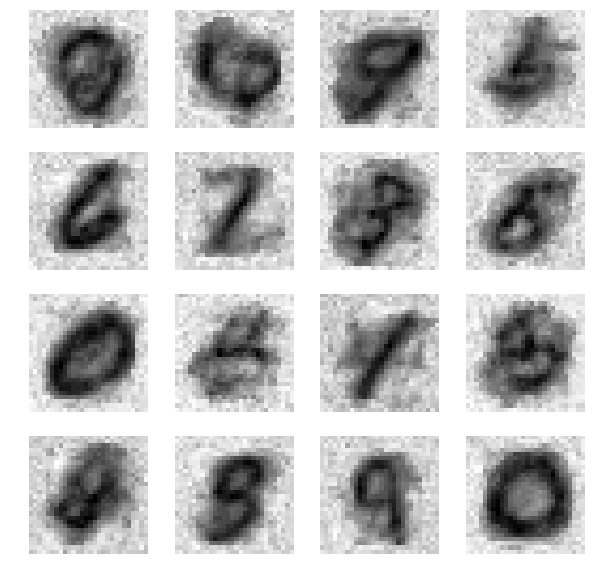

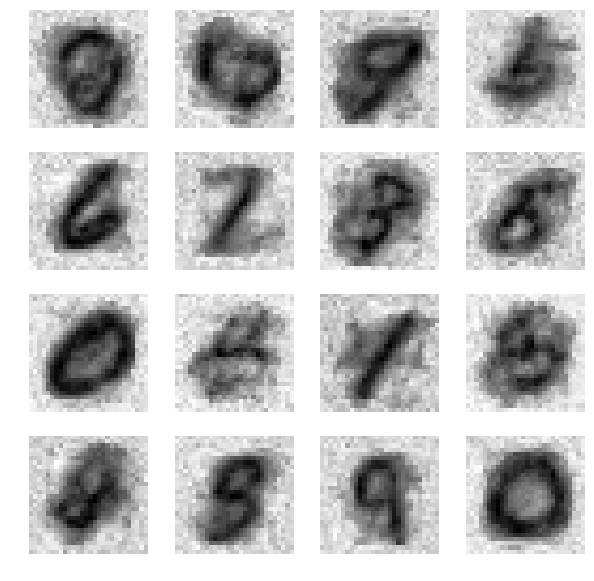

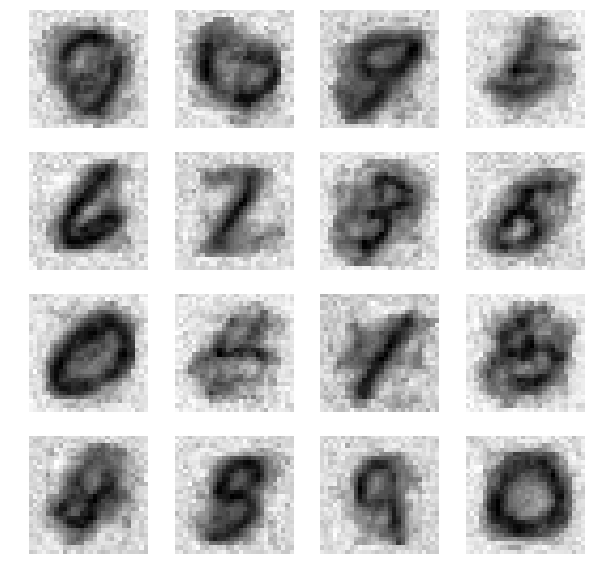

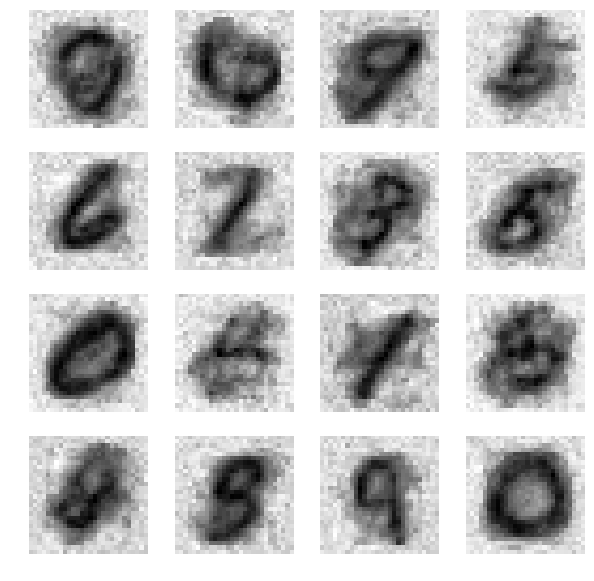

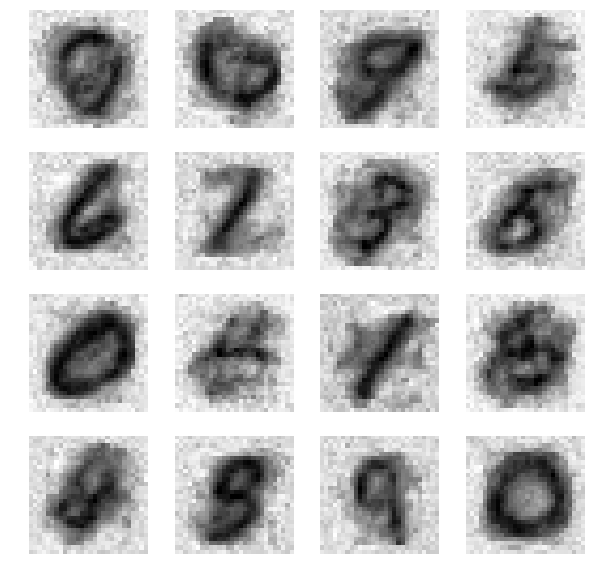

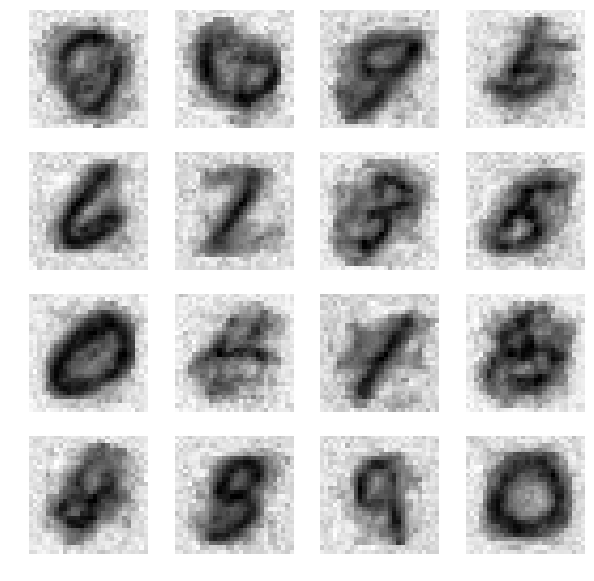

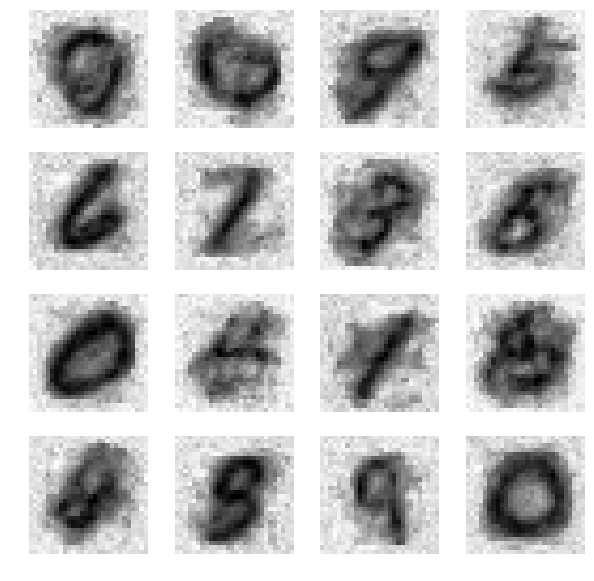

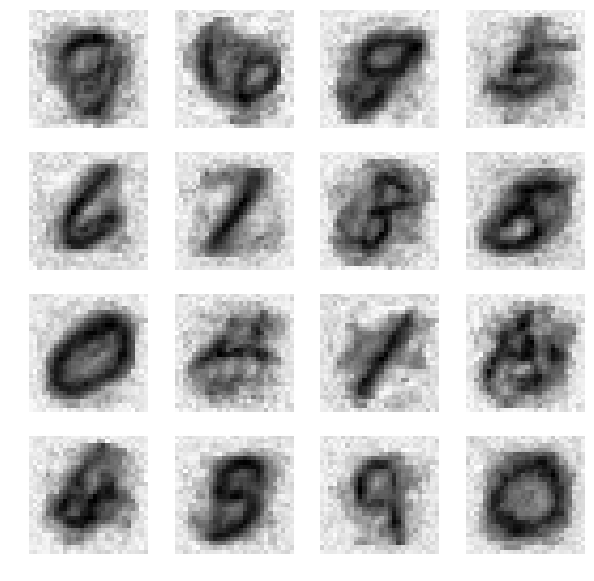

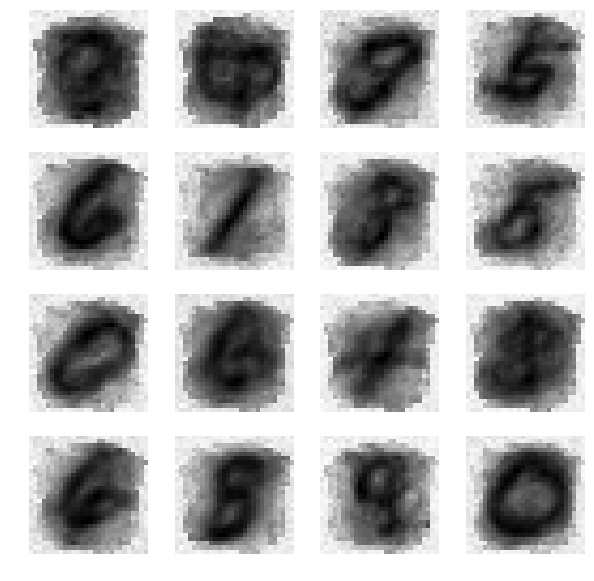

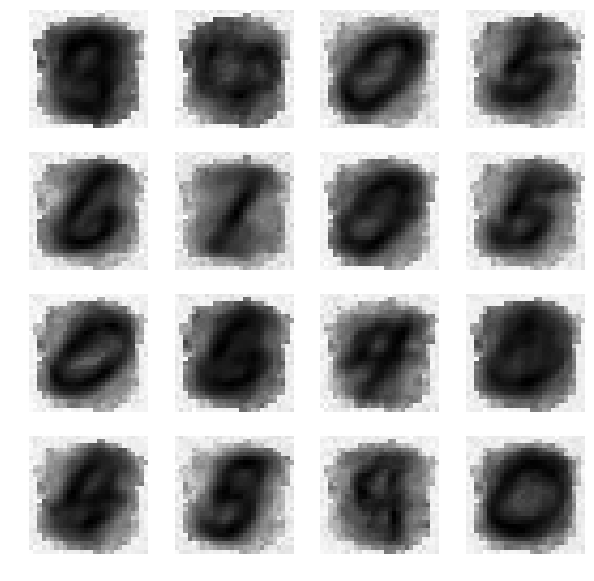

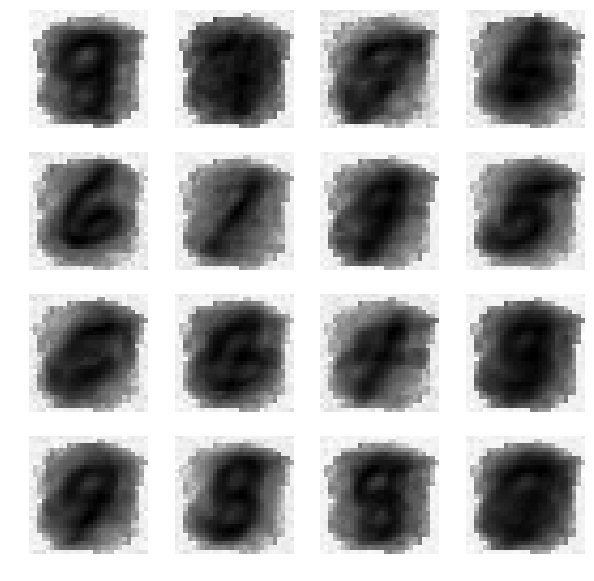

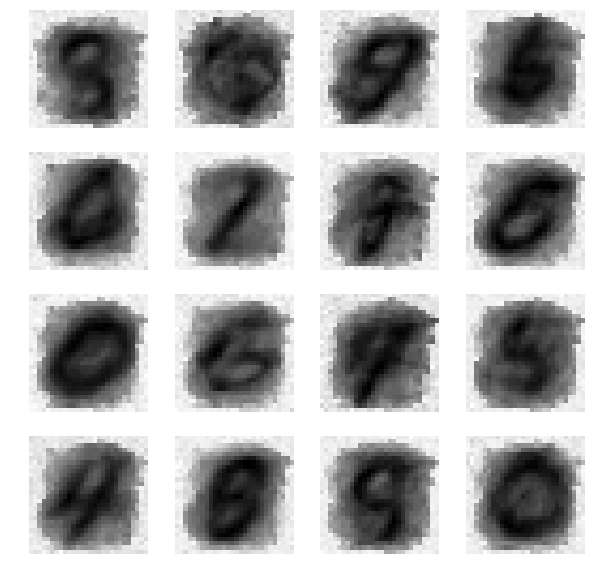

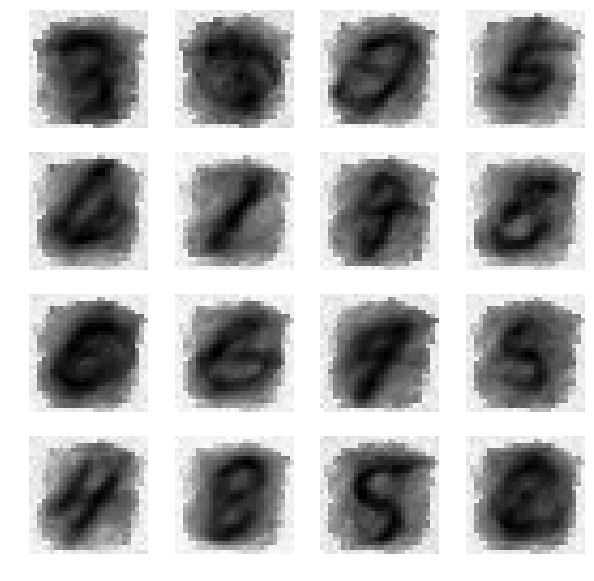

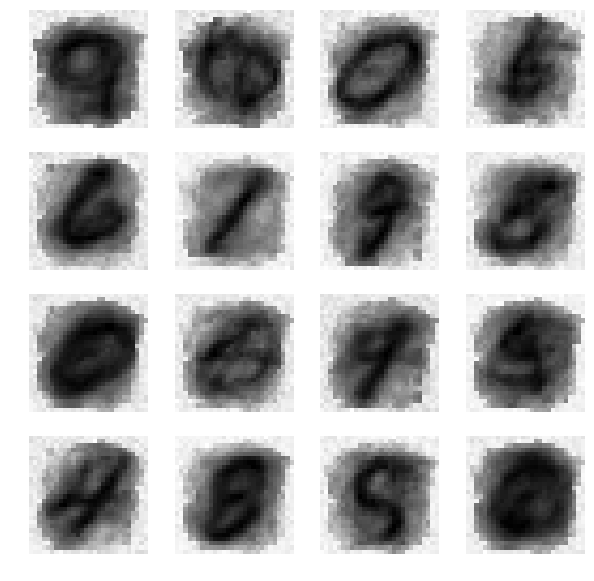

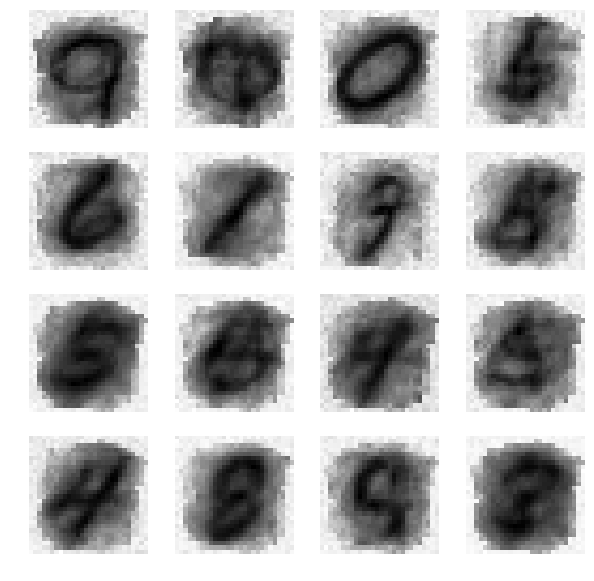

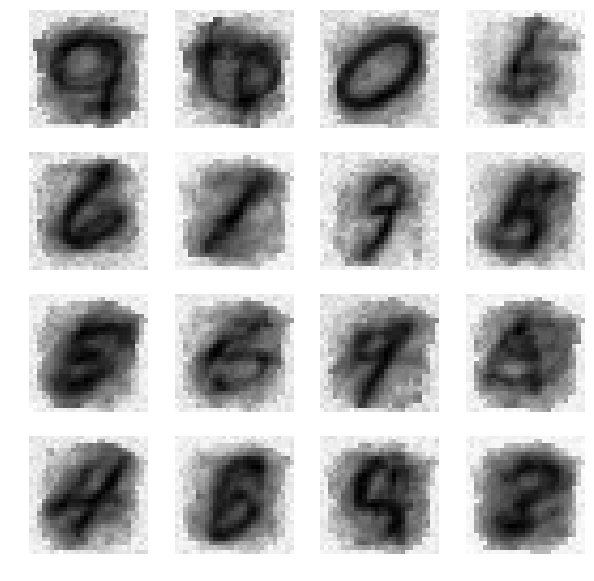

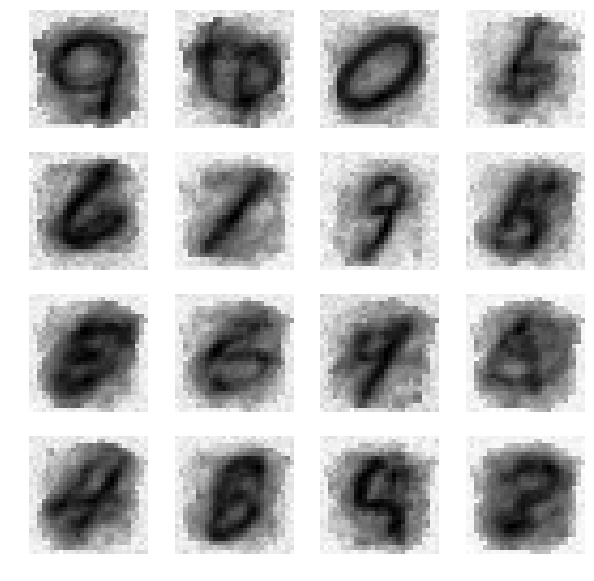

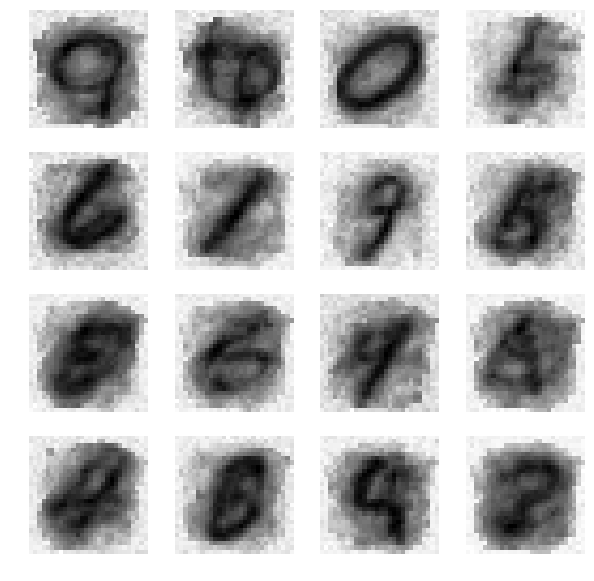

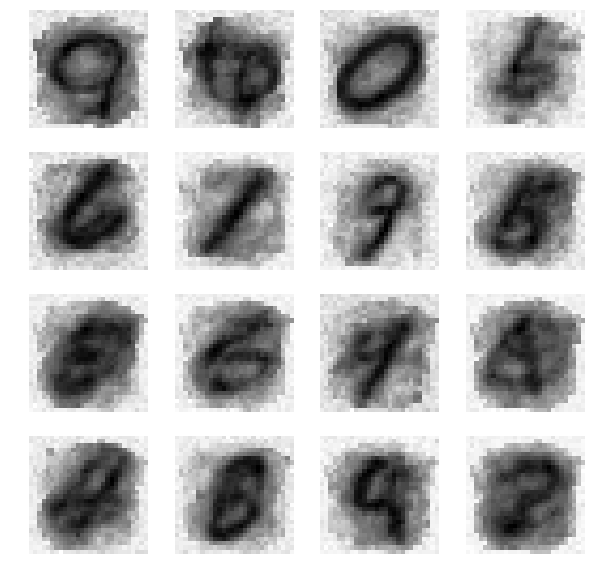

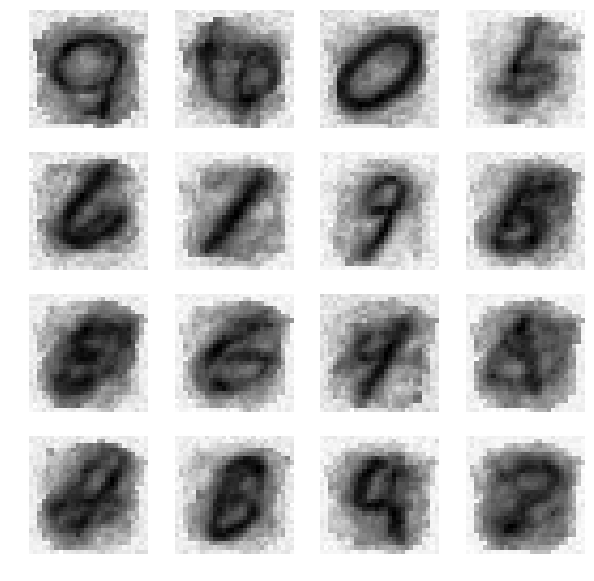

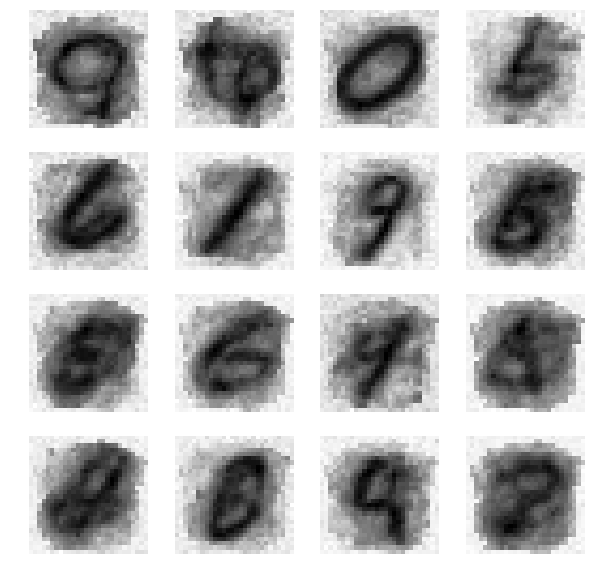

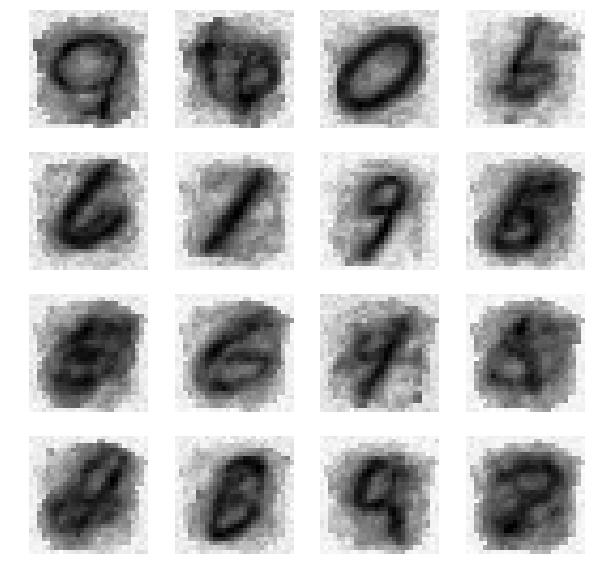

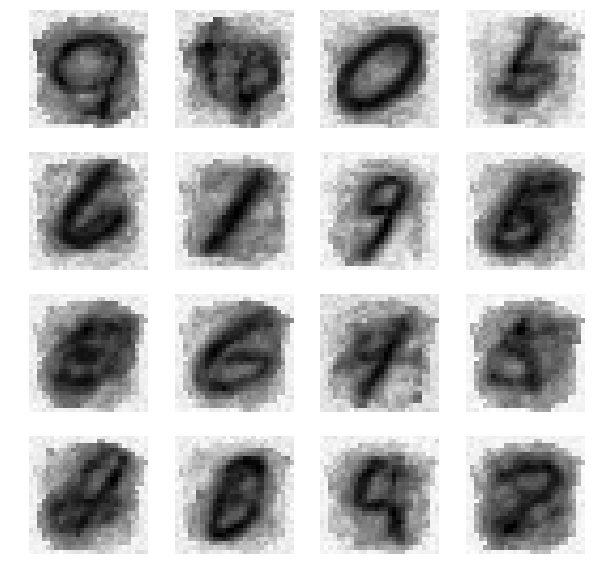

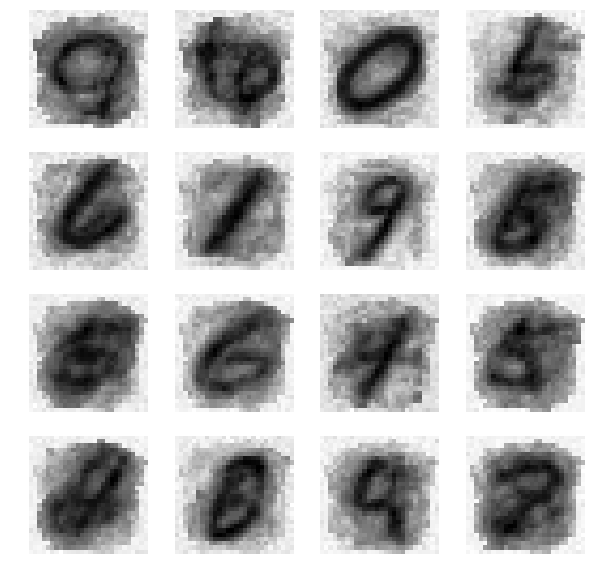

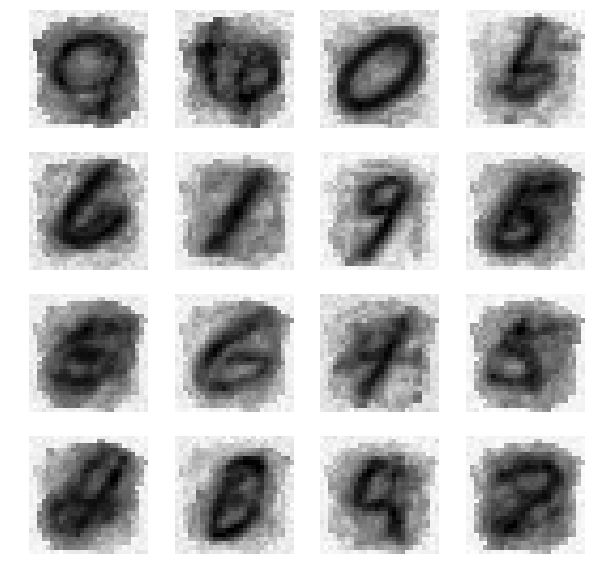

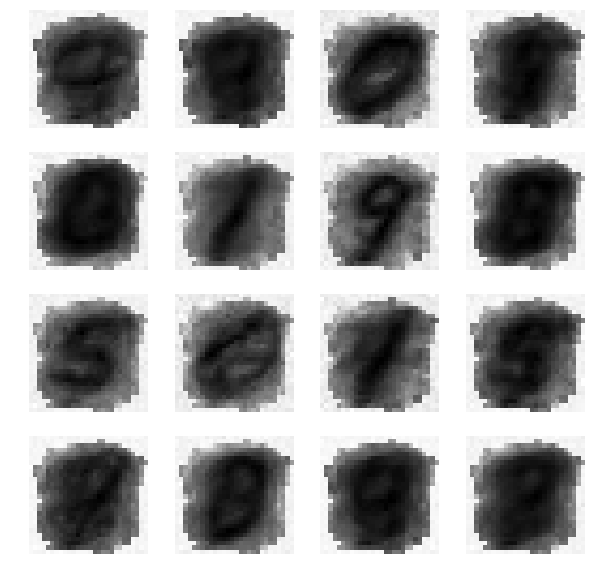

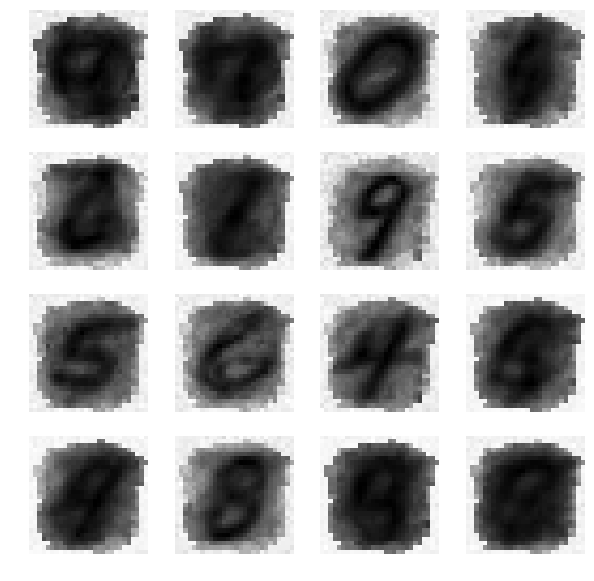

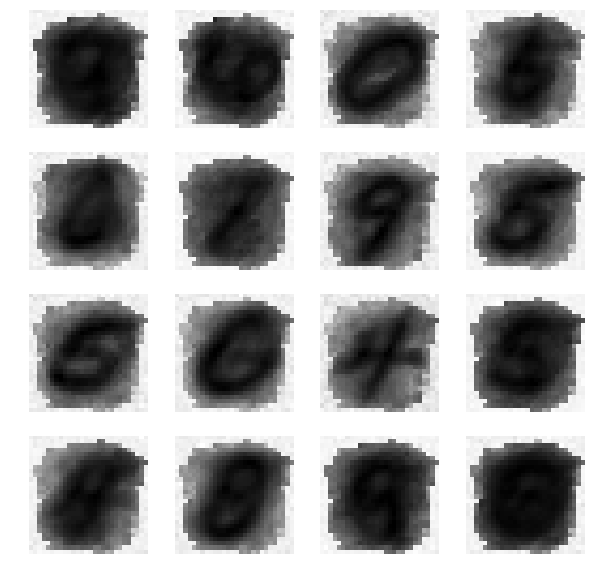

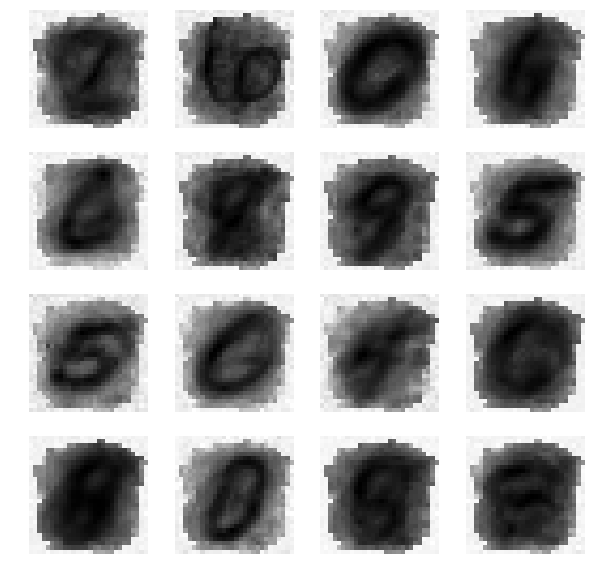

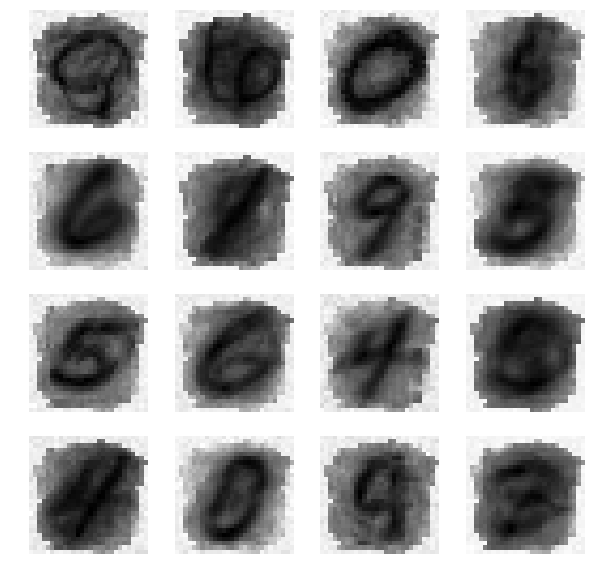

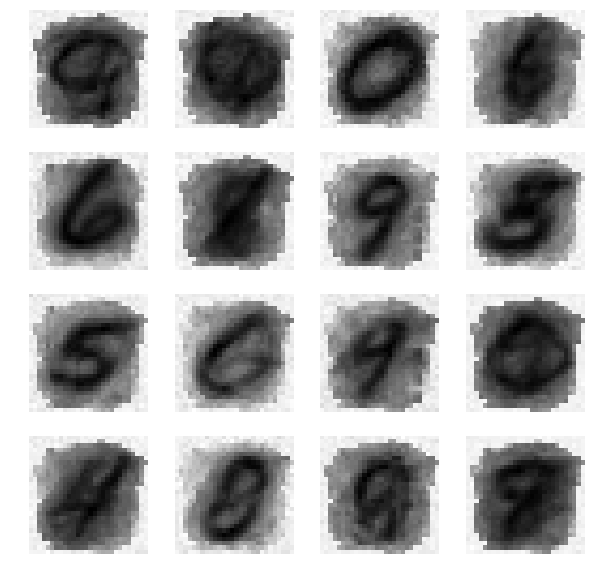

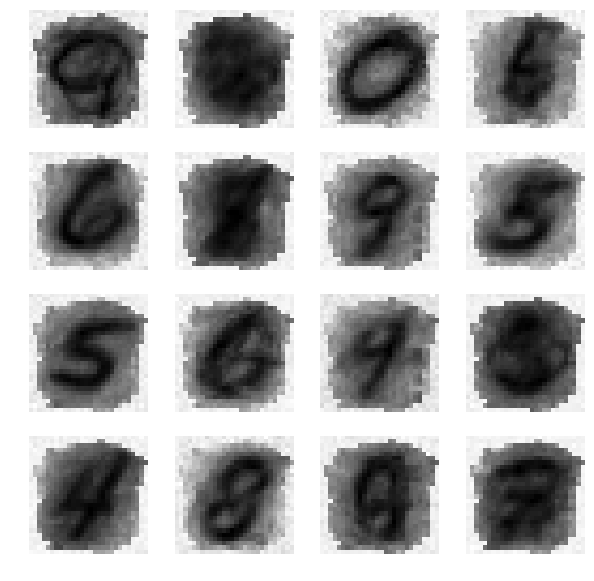

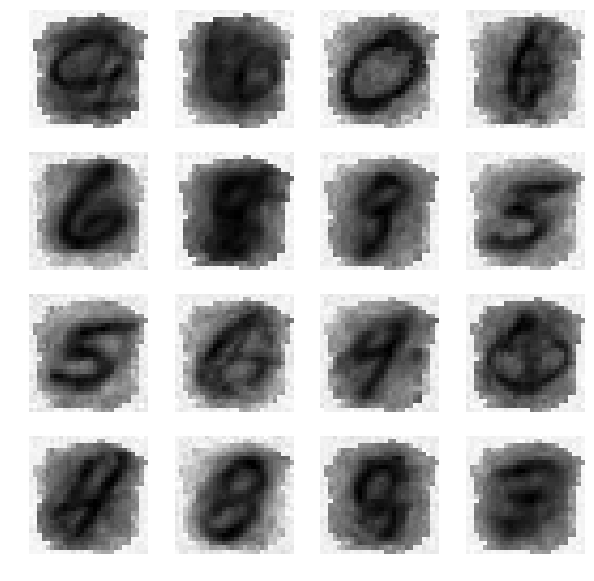

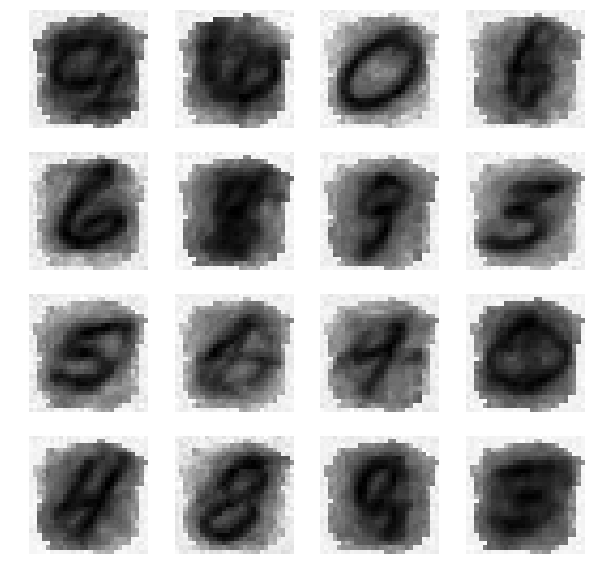

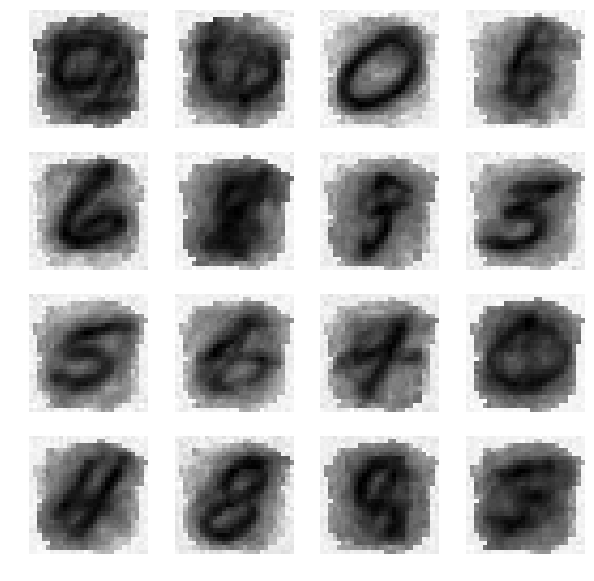

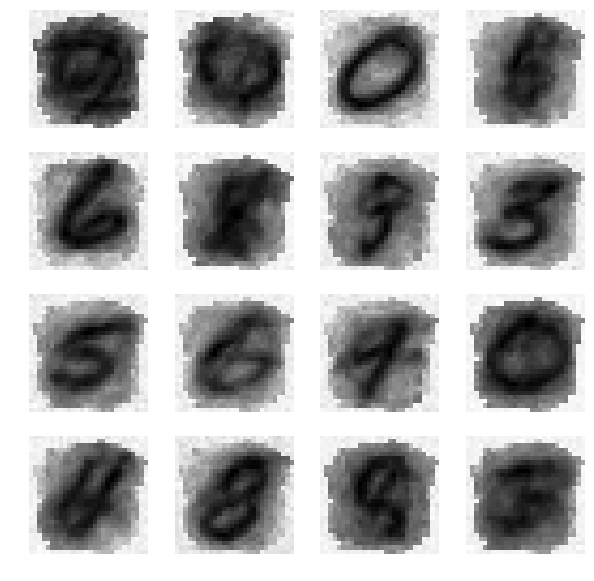

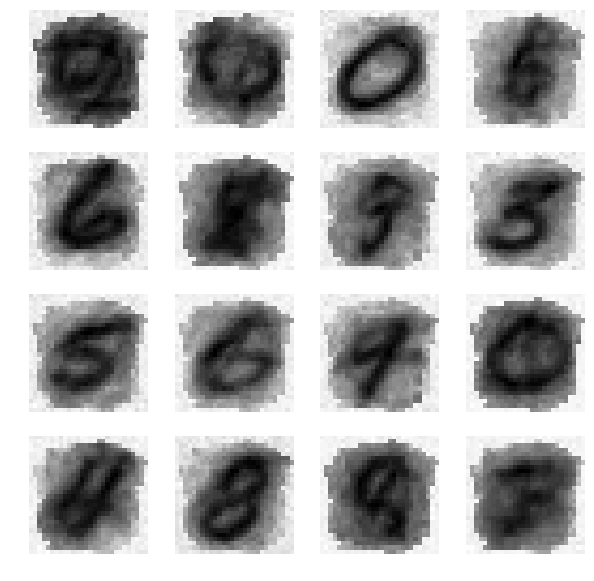

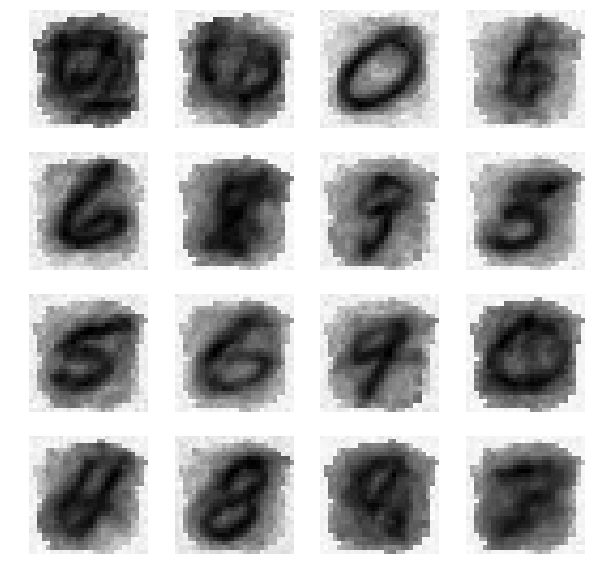

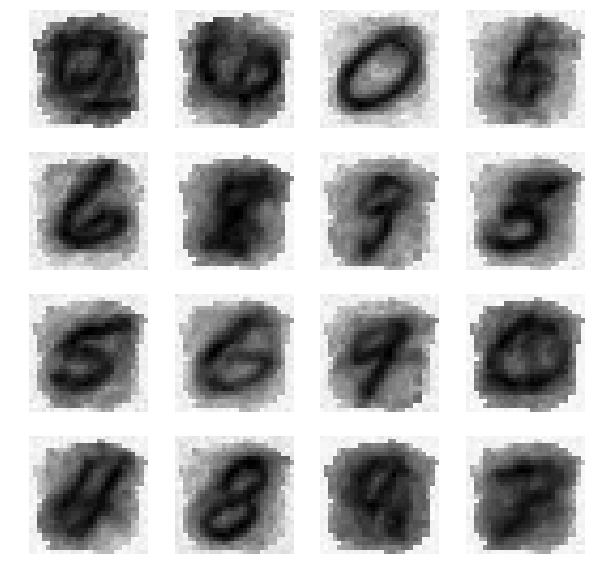

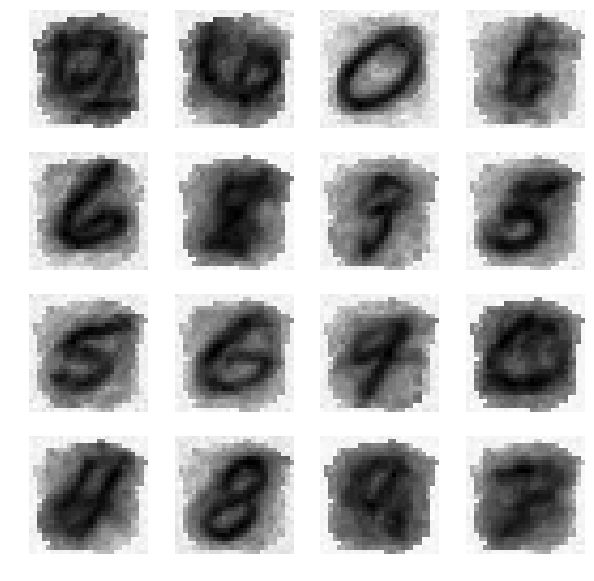

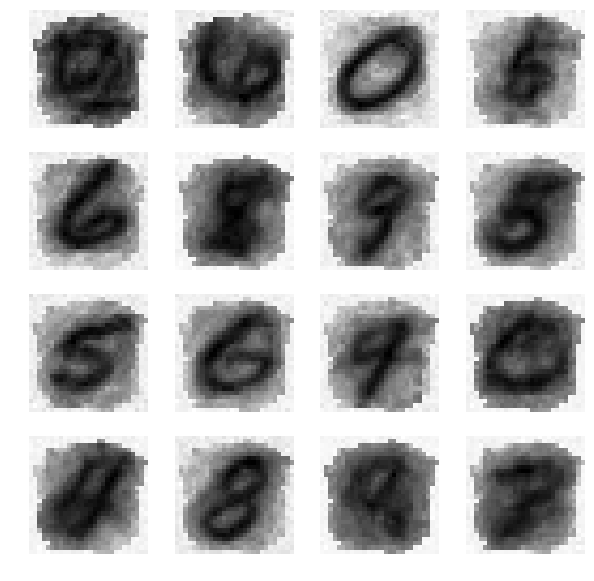

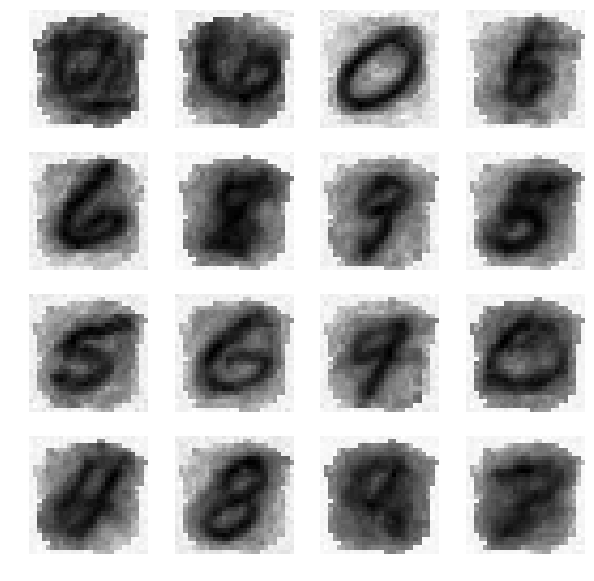

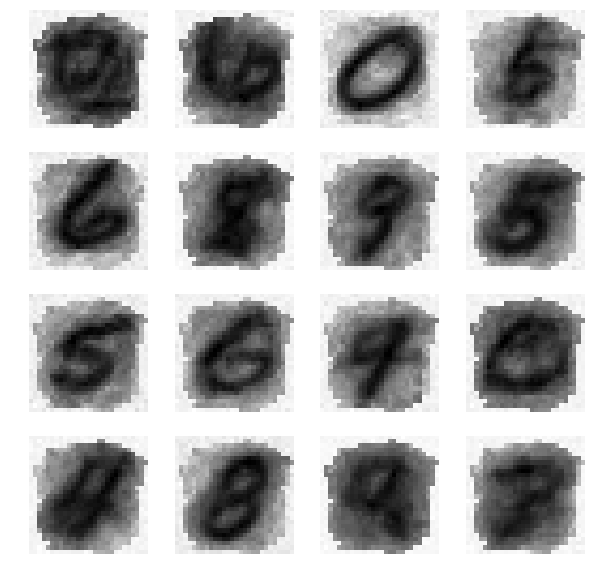

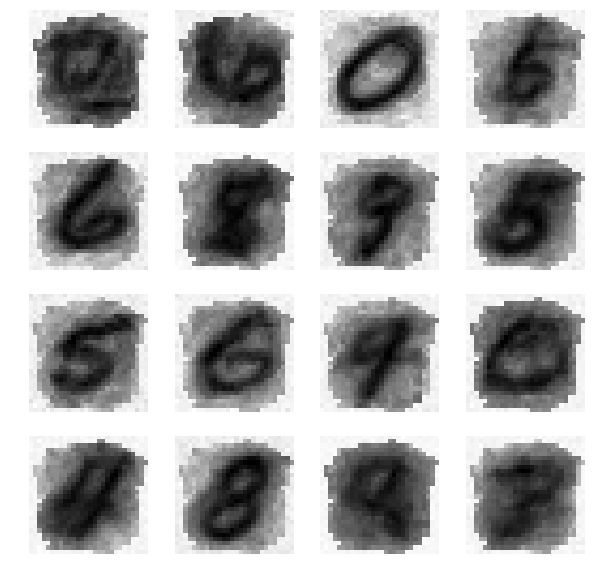

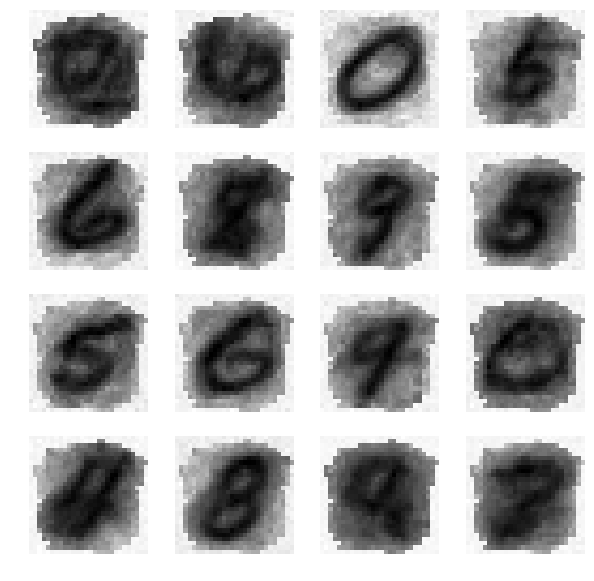

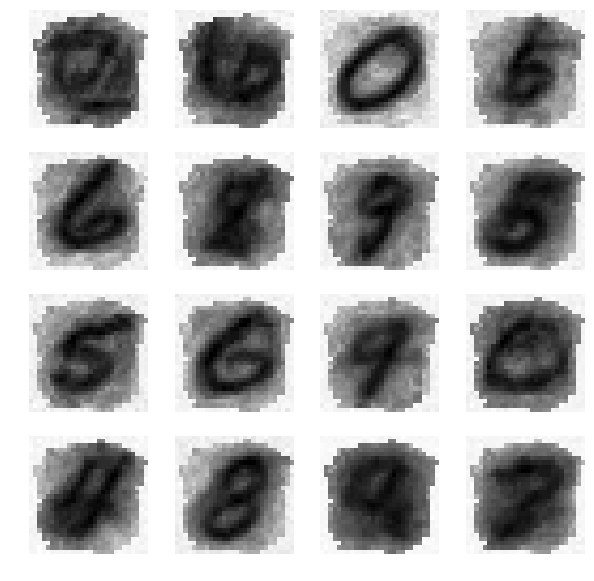

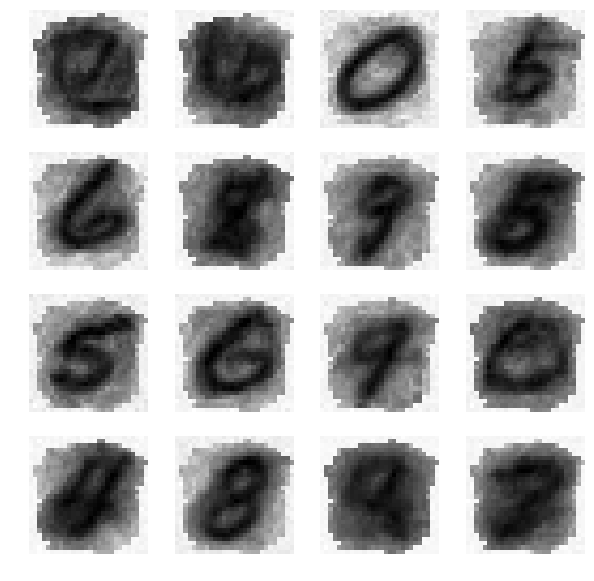

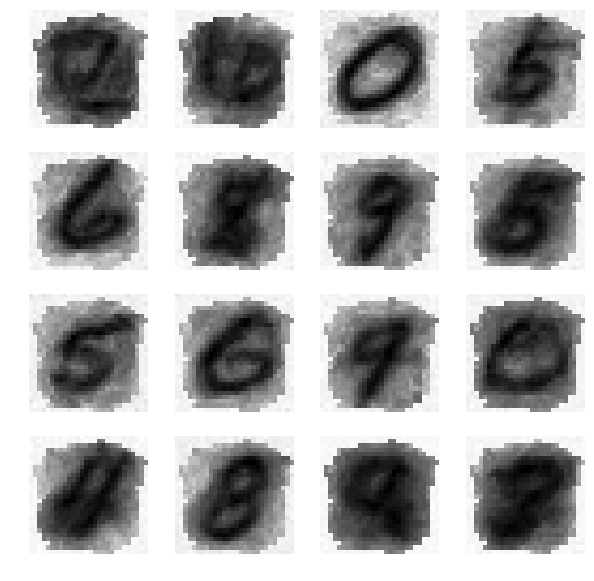

In [15]:
n_epochs = 60
batch_size = 150
n_batches = len(X_train) // batch_size
n_digts = 16
latent_vector = np.random.normal(size=[n_digts, n_hidden3])

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch in range(n_batches):
            print("\r{}%".format(100 * batch // n_batches), end="")
            # flush the writing buffer(output) immediately to the terminal, instead of being buffered
            sys.stdout.flush()  
            X_batch, Y_batch = fetch_batch(X_train, Y_train, epoch, batch, batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
            
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss], feed_dict={X: X_batch})
        print('\repoch {}'.format(epoch), 'total loss: {}'.format(loss_val), '\treconstruction loss: {}'.format(reconstruction_loss_val), '\tlatent loss: {}'.format(latent_loss_val))
        
        generated_logits = sess.run(logits, feed_dict={hidden3: latent_vector})
        plt.figure(figsize=(10, 10))
        for digit_index in range(n_digts):
            plt.subplot(4, 4, digit_index+1)
            plot_image(generated_logits[digit_index]) 
            
        saver.save(sess, './vas1.ckpt')

### Generate digits

In [21]:
# generate latent vector from standard multivariant Gaussian distribution
n_digts = 36
latent_vector = np.random.normal(size=[n_digts, n_hidden3])

In [17]:
tf.reset_default_graph()

INFO:tensorflow:Restoring parameters from ./vas1.ckpt


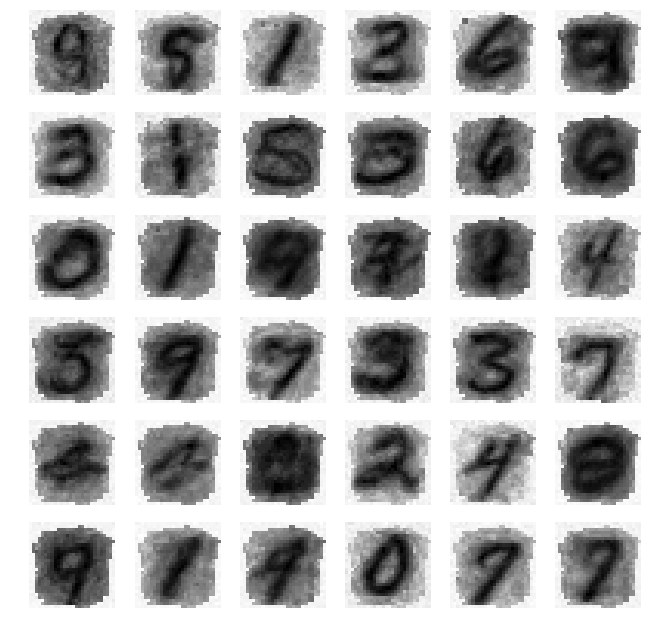

In [27]:
with tf.Session() as sess:
    saver.restore(sess, './vas1.ckpt')
    generated_logits_ckpt = sess.run(logits, feed_dict={hidden3: latent_vector})
    
# plot the figure
plt.figure(figsize=(11, 11))
for digit_index in range(n_digts):
    plt.subplot(6, 6, digit_index+1)
    plot_image(generated_logits_ckpt[digit_index]) 